In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
reccom_df=pd .read_csv("/content/drive/MyDrive/Recommendation system/beer_data.csv")

In [ ]:
reccom_df.head()

,beer_beerid,review_profilename,review_overall
0,48215.0,stcules,3.0
1,52159.0,oline73,3.0
2,52159.0,alpinebryant,3.0
3,52159.0,rawthar,4.0
4,52159.0,RangerClegg,3.5


In [ ]:
reccom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_beerid         475984 non-null  float64
 1   review_profilename  475884 non-null  object 
 2   review_overall      475984 non-null  float64
dtypes: float64(2), object(1)
memory usage: 10.9+ MB


In [ ]:
round(reccom_df.isnull().sum()/len(reccom_df)*100,2)

beer_beerid           0.00
review_profilename    0.02
review_overall        0.00
dtype: float64

In [ ]:
#there are 100 reviewer names missing from the data which is .02% of the total 
##so it can be dropped without harming our data

In [ ]:
reccom_df = reccom_df.dropna()

In [ ]:
reccom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475884 entries, 0 to 475983
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_beerid         475884 non-null  float64
 1   review_profilename  475884 non-null  object 
 2   review_overall      475884 non-null  float64
dtypes: float64(2), object(1)
memory usage: 14.5+ MB


In [ ]:
round(reccom_df.isnull().sum()/len(reccom_df)*100,2)

beer_beerid           0.0
review_profilename    0.0
review_overall        0.0
dtype: float64

All the Null Values are taken off

In [ ]:
#checkin duplicates on beer_beerid','review_profilename' columns
reccom_df.duplicated(['beer_beerid','review_profilename']).sum()

1422

In [ ]:
## Now dropping the duplicated values
reccom_df = reccom_df.drop_duplicates(['beer_beerid','review_profilename'],keep='first')

In [ ]:
reccom_df.shape

(474462, 3)

In [ ]:
reccom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474462 entries, 0 to 475983
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_beerid         474462 non-null  float64
 1   review_profilename  474462 non-null  object 
 2   review_overall      474462 non-null  float64
dtypes: float64(2), object(1)
memory usage: 14.5+ MB


In [ ]:
reccom_df.dtypes

beer_beerid           float64
review_profilename     object
review_overall        float64
dtype: object

In [ ]:
reccom_df.review_overall.describe()

count    474462.000000
mean          3.814274
std           0.720484
min           0.000000
25%           3.500000
50%           4.000000
75%           4.500000
max           5.000000
Name: review_overall, dtype: float64

In [ ]:
reccom_df.review_overall .value_counts()

4.0    174240
4.5     96937
3.5     90578
3.0     49426
5.0     27037
2.5     17557
2.0     11587
1.5      3810
1.0      3284
0.0         6
Name: review_overall, dtype: int64

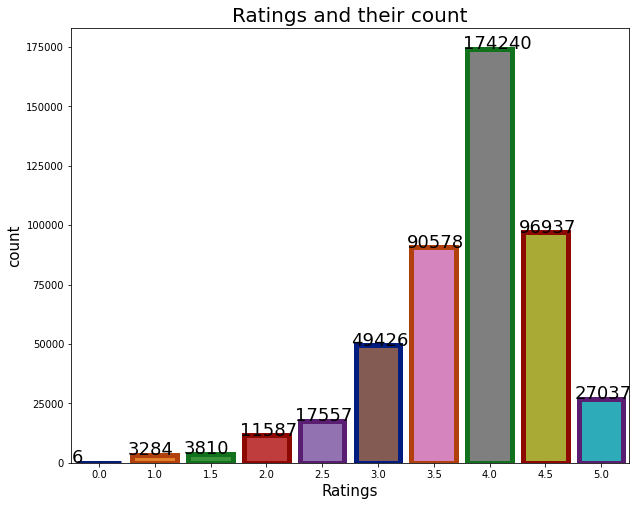

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="review_overall", data=reccom_df , 
linewidth=5,edgecolor=sns.color_palette("dark", 5))
plt.ylabel("count",fontsize=15)
plt.xlabel("Ratings",fontsize=15)
plt.title("Ratings and their count",fontsize=20)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.08, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.show()

Max ratings are given between 3.5-4.5.

<Figure size 1440x1440 with 0 Axes>

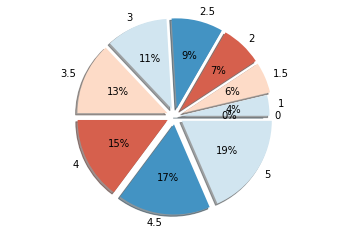

<Figure size 1440x1440 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,20))

labels =(['0','1','1.5','2','2.5','3','3.5','4','4.5','5'])
#count each type

zero = len(reccom_df[(reccom_df['review_overall']==0)])
one = len(reccom_df[(reccom_df['review_overall']==1)])
tw0 = len(reccom_df[(reccom_df['review_overall']==1.5)])
two= len(reccom_df[(reccom_df['review_overall']==2)])
two_andahalf = len(reccom_df[(reccom_df['review_overall']==2.5)])
three = len(reccom_df[(reccom_df['review_overall']==3)])
threeandahalf = len(reccom_df[(reccom_df['review_overall']==3.5)])
four = len(reccom_df[(reccom_df['review_overall']==4)])
fourandahalf = len(reccom_df[(reccom_df['review_overall']==4.5)])
five = len(reccom_df[(reccom_df['review_overall']==5)])


sizes = [0,1,1.5,2,2.5,3,3.5,4,4.5,5]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = [0,0.05,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09]
fig1, ax1 = plt.subplots()

colors = sns.color_palette("RdBu_r", n_colors=4)
plt.figure(figsize=(20,20))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', colors=colors,shadow=True, startangle=0)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

Data Preparation and Processing.

In [ ]:
reccom_df['beer_beerid'].nunique()

40304

There are 40304 unique beers in the dataset.

In [ ]:
round(reccom_df['beer_beerid'].nunique()/len(reccom_df)*100,2)

8.49

which is roughly 8.5 % of total dataset.

In [ ]:
reccom_df.beer_beerid.value_counts().sort_values(ascending=False)[:6]

2093.0    977
412.0     966
1904.0    902
1093.0    840
92.0      812
         ... 
156.0     256
9474.0    256
204.0     254
1503.0    254
6.0       253
Name: beer_beerid, Length: 254, dtype: int64

beer_id 2093 has the highest reviews of 977

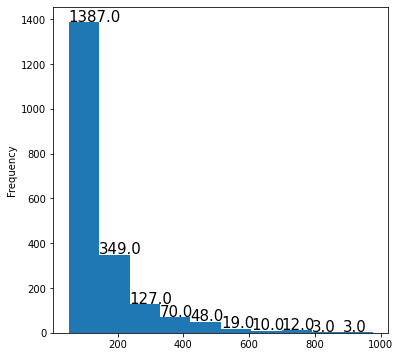

In [ ]:
plt.figure(figsize=(6,6))
ax_1=reccom_df['beer_beerid'].value_counts()[reccom_df['beer_beerid'].value_counts()>50].plot.hist(bins=10)
for i in ax_1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_1.text(i.get_x()-.08, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()

Majority of beers have 0-100 reviews

In [ ]:
len(reccom_df['beer_beerid'].value_counts()[reccom_df['beer_beerid'].value_counts()>50])

2028

In [ ]:
round(len(reccom_df['beer_beerid'].value_counts()[reccom_df['beer_beerid'].value_counts()>50])/len(reccom_df)*100,2)

0.43

Almost 0.45% of beers have more than 50 reviews

In [ ]:
avg_ratings = reccom_df.groupby('beer_beerid').mean().sort_values('review_overall',ascending = False).reset_index()
avg_ratings.head()

,beer_beerid,review_overall
0,66421.0,5.0
1,53127.0,5.0
2,25990.0,5.0
3,3681.0,5.0
4,26130.0,5.0


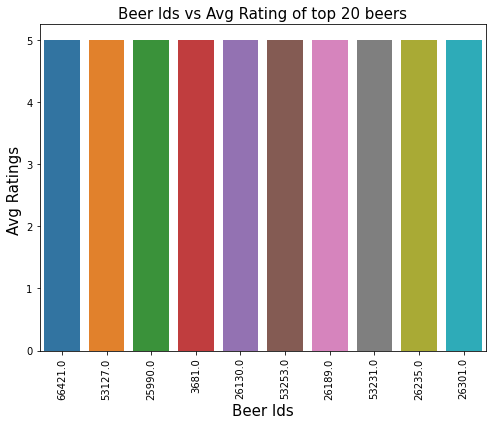

In [ ]:
plt.figure(figsize = (8,6))
ax = sns.barplot(x = 'beer_beerid', y = 'review_overall', data = avg_ratings.head(10), order = avg_ratings['beer_beerid'].head(10))
plt.xlabel("Beer Ids",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Avg Ratings ",fontsize=15)
plt.title("Beer Ids vs Avg Rating of top 20 beers",fontsize=15)
plt.show()

Top 15 beerids.

In [ ]:
reccom_df_1=reccom_df.loc[reccom_df['review_overall'] == 5]


In [ ]:
reccom_df_1['beer_beerid'].value_counts()[:10]

7971.0     337
1545.0     196
731.0      196
17112.0    180
1093.0     170
          ... 
42772.0      4
2864.0       4
1552.0       4
25142.0      4
10.0         4
Name: beer_beerid, Length: 1200, dtype: int64

Beer id 7971 received highest times the rating of 5.

In [ ]:
count_ratings_reviewer = reccom_df.groupby('review_profilename').count().sort_values('review_overall',ascending = False).reset_index()
count_ratings_reviewer.head()

,review_profilename,beer_beerid,review_overall
0,northyorksammy,1842,1842
1,mikesgroove,1373,1373
2,BuckeyeNation,1336,1336
3,Thorpe429,1072,1072
4,ChainGangGuy,1046,1046


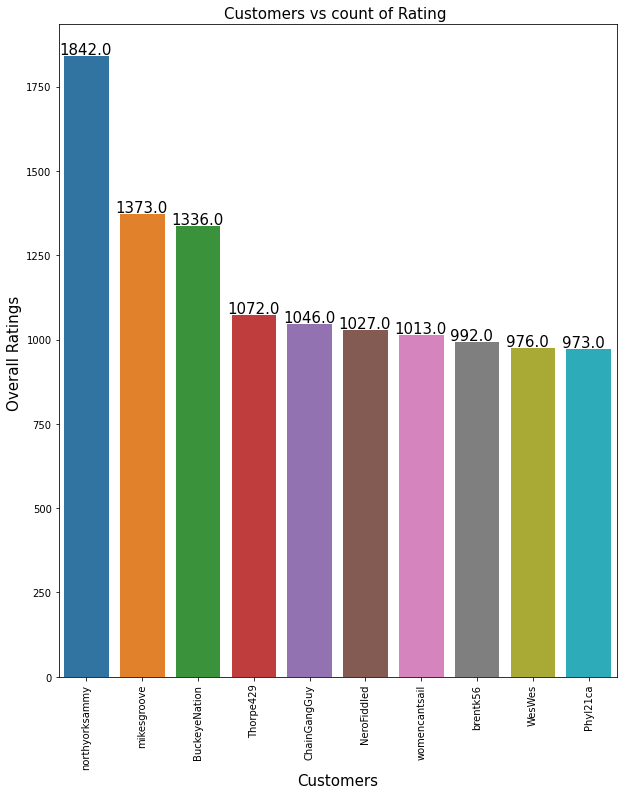

In [ ]:
plt.figure(figsize = (10,12))
ax_1 = sns.barplot(x = 'review_profilename', y = 'review_overall', data = count_ratings_reviewer.head(10), 
                 order = count_ratings_reviewer['review_profilename'].head(10))
for i in ax_1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_1.text(i.get_x()-.08, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.xlabel("Customers",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Overall Ratings ",fontsize=15)
plt.title("Customers vs count of Rating ",fontsize=15)
plt.show()

Top 10 customers who gave their feedback max times.

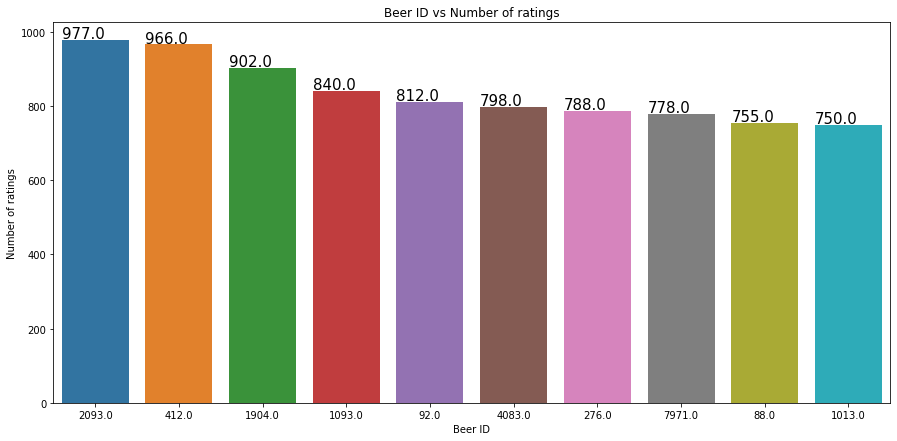

In [ ]:
plt.figure(figsize = (15,7))
df_rating_count = reccom_df.groupby('beer_beerid').count().sort_values('review_overall',ascending = False).reset_index().head(10)
ax_1 = sns.barplot(x = 'beer_beerid', y = 'review_overall', data = df_rating_count, order = df_rating_count['beer_beerid'])
for i in ax_1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_1.text(i.get_x()-0, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.xlabel('Beer ID')
plt.ylabel('Number of ratings')
plt.title('Beer ID vs Number of ratings')

plt.show()

Beers ids which got feedback maximum times.

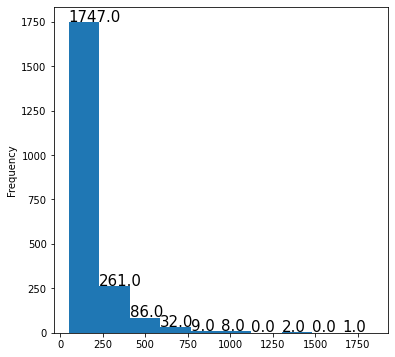

In [ ]:
plt.figure(figsize=(6,6))
ax_1=reccom_df['review_profilename'].value_counts()[reccom_df['review_profilename'].value_counts()>50].plot.hist(bins=10)
for i in ax_1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_1.text(i.get_x()-.08, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()

In [ ]:
avg_ratings_reviewer = reccom_df.groupby('review_profilename').mean().sort_values('review_overall',ascending = False).reset_index()
avg_ratings_reviewer.head()

,review_profilename,beer_beerid,review_overall
0,zzajjber,2270.0,5.0
1,heartofgold,7971.0,5.0
2,guinness72384,1160.0,5.0
3,gtochld11,1790.0,5.0
4,DogfishDave,8322.0,5.0


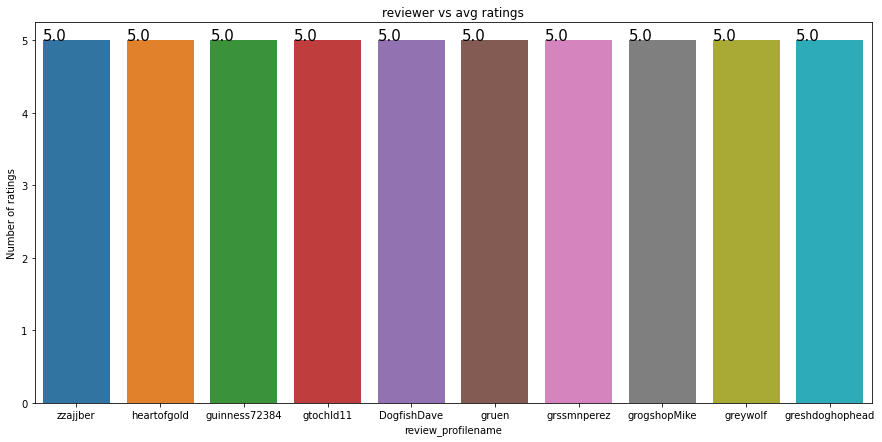

In [ ]:
plt.figure(figsize = (15,7))
avg_rating_reviewer_df = reccom_df.groupby('review_profilename').mean().sort_values('review_overall',ascending = False).reset_index().head(10)
ax_1 = sns.barplot(x = 'review_profilename', y = 'review_overall', data = avg_rating_reviewer_df, order = avg_rating_reviewer_df['review_profilename'])
for i in ax_1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_1.text(i.get_x()-0, i.get_height()+0, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.xlabel('review_profilename')
plt.ylabel('Number of ratings')
plt.title('reviewer vs avg ratings')

plt.show()

Average ratings given by reviewers.

In [ ]:
beers = reccom_df.groupby('beer_beerid')['review_overall'].count().reset_index()
beers.count()

beers = beers.sort_values('review_overall', ascending=False)

beers_count = beers[beers.review_overall >= 50]
beers_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 1574 to 39270
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beer_beerid     2064 non-null   float64
 1   review_overall  2064 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 48.4 KB


In [ ]:
beers_count.head()

,beer_beerid,review_overall
1574,2093.0,977
338,412.0,966
1427,1904.0,902
818,1093.0,840
78,92.0,812


In [ ]:
reviewers = reccom_df.groupby('review_profilename')['review_overall'].count().reset_index()
reviewers_count = reviewers[reviewers.review_overall >= 30]

reviewers_count = reviewers_count.sort_values('review_overall', ascending=False)

reviewers_count.head(5)

,review_profilename,review_overall
18188,northyorksammy,1842
17373,mikesgroove,1373
1629,BuckeyeNation,1336
8470,Thorpe429,1072
1910,ChainGangGuy,1046


Creating new dataframe with beer_id reviews >= 50 and users reviews >= 30

In [ ]:
filtered_df = reccom_df.merge(beers_count,how='inner',on='beer_beerid')
filtered_df= filtered_df.merge(reviewers_count,how='inner',on='review_profilename')

In [ ]:
filtered_df.head()

,beer_beerid,review_profilename,review_overall_x,review_overall_y,review_overall
0,436.0,Brent,3.0,127,518
1,10784.0,Brent,4.0,119,518
2,16074.0,Brent,4.0,431,518
3,33644.0,Brent,4.0,261,518
4,1122.0,Brent,5.0,54,518


In [ ]:
## Renaming columns
filtered_df.rename(columns={'review_overall_x' : 'beer_rating','review_overall_y':'beers_reviews',
                           'review_overall' : 'users_reviews'},
                  inplace = True)

In [ ]:
filtered_df.head()


,beer_beerid,review_profilename,beer_rating,beers_reviews,users_reviews
0,436.0,Brent,3.0,127,518
1,10784.0,Brent,4.0,119,518
2,16074.0,Brent,4.0,431,518
3,33644.0,Brent,4.0,261,518
4,1122.0,Brent,5.0,54,518


In [ ]:
filtered_df.beer_rating.value_counts(ascending=True)

1.0     1120
1.5     1343
2.0     4474
2.5     7012
5.0    13081
3.0    21189
3.5    42543
4.5    51086
4.0    88240
Name: beer_rating, dtype: int64

In [ ]:
# Visualise the rating values and notice:
# The average beer ratings :

beer_ratings_avg = filtered_df.groupby('beer_beerid')['beer_rating'].agg(['mean']).reset_index()

beer_ratings_avg.sort_values(by='mean',ascending=False)[:10]

,beer_beerid,mean
1136,16814.0,4.636364
499,1545.0,4.603571
1545,36316.0,4.602564
1237,21690.0,4.594697
985,7971.0,4.567568
371,1062.0,4.547945
2019,64228.0,4.533333
318,857.0,4.527108
1808,47658.0,4.519380
272,731.0,4.508216


Top 10 beers which got highest average rating.

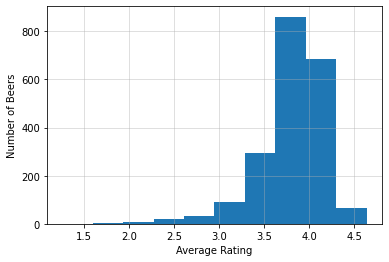

In [ ]:
plt.hist(beer_ratings_avg['mean'], bins=10)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Rating')
plt.ylabel('Number of Beers')
plt.show()

In [ ]:
# Visualise the rating values and notice:
# The average user ratings :

user_ratings_avg = filtered_df.groupby('review_profilename')['beer_rating'].agg(['mean']).reset_index()

user_ratings_avg.sort_values(by='mean',ascending=False)[:10]

,review_profilename,mean
1400,aglose45,4.456522
440,EssexAleMan,4.456522
1858,doopiedoopiedoo,4.444444
434,EnojysAnyBeer,4.435780
773,Lukie,4.423077
2238,joshuaseresse,4.416667
187,Birdiebeagle,4.414286
2556,noelcb,4.411290
921,OldSock,4.406250
2567,nsmit17,4.405660


Top 10 customesr who gave max avg rating.

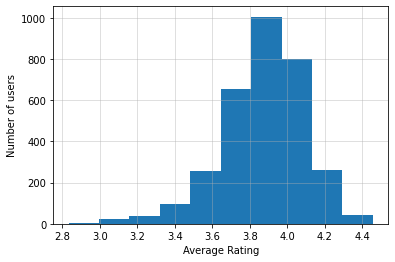

In [ ]:
plt.hist(user_ratings_avg['mean'], bins=10)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Rating')
plt.ylabel('Number of users')
plt.show()

usually users give ratings between 3.5-4.4

In [ ]:
user_beer_ratings_avg = filtered_df.groupby('review_profilename')['beers_reviews'].agg(['mean']).reset_index()

user_beer_ratings_avg.sort_values(by='mean',ascending=False)[:10]

,review_profilename,mean
2208,jmfc8237,499.681818
2020,goalie33,463.975610
2287,kdoc8,439.437500
1639,brsett,427.090909
1065,Running4beer,426.920000
2604,originalsin,421.818182
656,Jdiddy,418.350000
2237,joshuadlight,417.300000
2054,haddon,416.177778
1918,elmore,414.400000


In [ ]:
filtered_df.shape

(230088, 5)

**Recommendation Model.**

In [ ]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(filtered_df , test_size = 0.30 , random_state=31)

In [ ]:
print(train.shape)
print(test.shape)


(161061, 5)
(69027, 5)


In [ ]:
df_beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
).fillna(0)

In [ ]:
df_beer_features.head()

beer_beerid,5.0,6.0,7.0,10.0,14.0,15.0,17.0,19.0,30.0,31.0,...,72138.0,73131.0,74123.0,74272.0,74323.0,74390.0,74548.0,74579.0,74986.0,75086.0
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,3.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Copy train and test dataset.**


These dataset will be used for prediction and evaluation.

Dummy train will be used later for prediction of the beers which has not been rated by the user. To ignore the beers rated by the user, we will mark it as 0 during prediction. The beers not rated by user is marked as 1 for prediction. Dummy test will be used for evaluation. To evaluate, we will only make prediction on the beers rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [ ]:
dummy_train =  train.copy()
dummy_test = test.copy()


In [ ]:
dummy_train['beer_rating'] = dummy_train['beer_rating'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['beer_rating'] = dummy_test['beer_rating'].apply(lambda x: 1 if x>=1 else 0)

In [ ]:
dummy_train = dummy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
).fillna(1)

# The beers not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
     index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
).fillna(0)

In [ ]:
dummy_train.head()

beer_beerid,5.0,6.0,7.0,10.0,14.0,15.0,17.0,19.0,30.0,31.0,...,72138.0,73131.0,74123.0,74272.0,74323.0,74390.0,74548.0,74579.0,74986.0,75086.0
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100floods,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1759Girl,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1fastz28,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
dummy_test.head()

beer_beerid,5.0,6.0,7.0,10.0,14.0,15.0,17.0,19.0,30.0,31.0,...,72138.0,73131.0,74123.0,74272.0,74323.0,74390.0,74548.0,74579.0,74986.0,75086.0
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**User Similarity matrix**

**Cosine similarity**

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.         0.0602183  ... 0.         0.         0.        ]
 [0.         1.         0.10346685 ... 0.03699533 0.0236273  0.        ]
 [0.0602183  0.10346685 1.         ... 0.0406859  0.04209458 0.        ]
 ...
 [0.         0.03699533 0.0406859  ... 1.         0.         0.        ]
 [0.         0.0236273  0.04209458 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
user_correlation.shape

(3176, 3176)

**Using adjusted cosine**

Here, not removing the Nan values and calculating the mean only for the beer rated by the user.

In [ ]:
beer_features  = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
)

In [ ]:
beer_features.head()

beer_beerid,5.0,6.0,7.0,10.0,14.0,15.0,17.0,19.0,30.0,31.0,...,72138.0,73131.0,74123.0,74272.0,74323.0,74390.0,74548.0,74579.0,74986.0,75086.0
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,3.5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Normalising the beers rating for each user aroun 0 mean.**

In [ ]:
mean = np.nanmean(beer_features,axis=1)
df_normalized= (beer_features.T-mean).T

In [ ]:
df_normalized.head()


beer_beerid,5.0,6.0,7.0,10.0,14.0,15.0,17.0,19.0,30.0,31.0,...,72138.0,73131.0,74123.0,74272.0,74323.0,74390.0,74548.0,74579.0,74986.0,75086.0
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,-0.414286,NaN,0.085714,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.414286,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Finding Cosine Similarity.**

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

user_correlation = 1-pairwise_distances(df_normalized.fillna(0),metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)


[[ 1.          0.         -0.06414558 ...  0.          0.
   0.        ]
 [ 0.          1.         -0.00228504 ... -0.05790255  0.06023922
   0.        ]
 [-0.06414558 -0.00228504  1.         ... -0.03519429  0.00183073
   0.        ]
 ...
 [ 0.         -0.05790255 -0.03519429 ...  1.          0.
   0.        ]
 [ 0.          0.06023922  0.00183073 ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


**Prediction**

Predicting for the users which are positively related with other users as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0,which shows negative correlation.

In [ ]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.06023922,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.00183073,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.06023922, 0.00183073, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

Rating predicted by the user(for beers rated as well as not rated) is the weighted sum of
correlattions with the beer rating

In [ ]:
predited_user_rating = np.dot(user_correlation , beer_features.fillna(0))
predited_user_rating

array([[0.61039704, 1.72279843, 1.36214621, ..., 0.62420766, 2.82080727,
        0.99231436],
       [1.66443759, 2.14711237, 0.69200199, ..., 0.74099867, 2.04906253,
        0.86336431],
       [0.52377378, 1.82480268, 1.04792713, ..., 0.4432223 , 1.71922619,
        1.05363811],
       ...,
       [5.5678924 , 9.29745449, 6.23046759, ..., 1.13701527, 2.13614007,
        2.30718296],
       [1.97947193, 7.07130735, 4.30857589, ..., 1.48618433, 3.74988629,
        2.39569835],
       [2.80722472, 5.94664066, 5.96713478, ..., 0.56440372, 1.18095984,
        0.87396612]])

In [ ]:
predited_user_rating.shape

(3176, 2064)

Since we are interested only in the beers not rated by the user, we will ignore the beers rated by the user by making it zero.

In [ ]:
user_final_rating = np.multiply(predited_user_rating,dummy_train)
user_final_rating.head()

beer_beerid,5.0,6.0,7.0,10.0,14.0,15.0,17.0,19.0,30.0,31.0,...,72138.0,73131.0,74123.0,74272.0,74323.0,74390.0,74548.0,74579.0,74986.0,75086.0
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.610397,1.722798,1.362146,2.141070,0.369895,0.383252,2.113342,1.961627,2.819374,1.976968,...,3.390042,0.678063,0.326128,0.253216,0.442418,0.547199,0.263970,0.624208,2.820807,0.992314
05Harley,1.664438,2.147112,0.692002,3.724911,1.058872,0.550662,2.200264,2.433362,6.644756,3.446933,...,2.959702,1.557341,1.697406,1.224707,1.361091,0.931572,0.302531,0.740999,2.049063,0.863364
100floods,0.523774,1.824803,1.047927,2.644286,0.559558,0.518280,2.056407,0.604081,4.704061,2.826710,...,2.775227,1.138070,0.921139,0.799246,0.928896,0.407379,0.373765,0.443222,1.719226,1.053638
1759Girl,3.908027,5.859433,5.252396,5.036963,0.976712,1.844689,5.079369,4.288644,13.393551,11.658378,...,8.233936,1.917028,2.616136,1.563181,0.776449,2.033107,0.794691,1.025401,3.980731,2.341455
1fastz28,4.815593,0.000000,4.905942,0.000000,1.706551,2.715959,7.536724,5.929532,17.256364,12.775257,...,6.539913,2.344918,0.000000,2.319006,2.686793,2.146486,1.834994,1.485009,3.694725,3.660908


**Top 10 recommendations for user 1**

In [ ]:
 user_final_rating.iloc[1].sort_values(ascending=False)[:10]

beer_beerid
412.0      13.821406
7971.0     13.571447
1093.0     12.684253
731.0      12.190091
4083.0     11.860894
             ...    
6368.0      3.744178
358.0       3.736816
38180.0     3.730338
87.0        3.727773
10.0        3.724911
Name: 05Harley, Length: 273, dtype: float64

In [ ]:
## Similarity between top 10 users
top_10 = user_final_rating.iloc[:10,:10]
top_10

beer_beerid,5.0,6.0,7.0,10.0,14.0,15.0,17.0,19.0,30.0,31.0
review_profilename,,,,,,,,,,
0110x011,0.610397,1.722798,1.362146,2.141070,0.369895,0.383252,2.113342,1.961627,2.819374,1.976968
05Harley,1.664438,2.147112,0.692002,3.724911,1.058872,0.550662,2.200264,2.433362,6.644756,3.446933
100floods,0.523774,1.824803,1.047927,2.644286,0.559558,0.518280,2.056407,0.604081,4.704061,2.826710
1759Girl,3.908027,5.859433,5.252396,5.036963,0.976712,1.844689,5.079369,4.288644,13.393551,11.658378
1fastz28,4.815593,0.000000,4.905942,0.000000,1.706551,2.715959,7.536724,5.929532,17.256364,12.775257
32hoss32,5.472124,12.481454,7.297526,10.399327,2.684377,3.918875,11.601381,13.556489,19.959359,14.706261
3Vandoo,3.480323,8.791760,6.496762,7.020231,2.729103,2.866485,8.357472,6.616828,15.473603,15.761703
4000qtrap,1.076510,3.355284,2.680254,4.781979,0.555923,1.194385,3.203911,3.101407,7.036289,4.828112
4DAloveofSTOUT,1.092365,2.982695,1.312129,3.146400,1.055447,0.516325,2.239973,2.304614,4.619736,2.490010


In [ ]:
## Taking transpose
top_10_trans = top_10.T
top_10_trans

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz
beer_beerid,,,,,,,,,,
5.0,0.610397,1.664438,0.523774,3.908027,4.815593,5.472124,3.480323,1.076510,1.092365,1.396310
6.0,1.722798,2.147112,1.824803,5.859433,0.000000,12.481454,8.791760,3.355284,2.982695,3.298512
7.0,1.362146,0.692002,1.047927,5.252396,4.905942,7.297526,6.496762,2.680254,1.312129,3.263065
10.0,2.141070,3.724911,2.644286,5.036963,0.000000,10.399327,7.020231,4.781979,3.146400,3.325866
14.0,0.369895,1.058872,0.559558,0.976712,1.706551,2.684377,2.729103,0.555923,1.055447,1.061288
15.0,0.383252,0.550662,0.518280,1.844689,2.715959,3.918875,2.866485,1.194385,0.516325,1.706977
17.0,2.113342,2.200264,2.056407,5.079369,7.536724,11.601381,8.357472,3.203911,2.239973,2.684640
19.0,1.961627,2.433362,0.604081,4.288644,5.929532,13.556489,6.616828,3.101407,2.304614,3.550455
30.0,2.819374,6.644756,4.704061,13.393551,17.256364,19.959359,15.473603,7.036289,4.619736,8.618197


In [ ]:
top_10_trans.corr(method='pearson')

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz
review_profilename,,,,,,,,,,
0110x011,1.000000,0.820068,0.826120,0.772922,0.563283,0.939698,0.815329,0.933986,0.913073,0.762883
05Harley,0.820068,1.000000,0.922648,0.837775,0.692170,0.862409,0.798342,0.915157,0.927229,0.828418
100floods,0.826120,0.922648,1.000000,0.884236,0.677293,0.827498,0.873612,0.941497,0.897952,0.857012
1759Girl,0.772922,0.837775,0.884236,1.000000,0.840489,0.874985,0.971228,0.891482,0.783075,0.974003
1fastz28,0.563283,0.692170,0.677293,0.840489,1.000000,0.702094,0.789723,0.650048,0.512647,0.838427
32hoss32,0.939698,0.862409,0.827498,0.874985,0.702094,1.000000,0.898007,0.923996,0.911321,0.871424
3Vandoo,0.815329,0.798342,0.873612,0.971228,0.789723,0.898007,1.000000,0.891785,0.790981,0.965778
4000qtrap,0.933986,0.915157,0.941497,0.891482,0.650048,0.923996,0.891785,1.000000,0.933385,0.893176
4DAloveofSTOUT,0.913073,0.927229,0.897952,0.783075,0.512647,0.911321,0.790981,0.933385,1.000000,0.763545


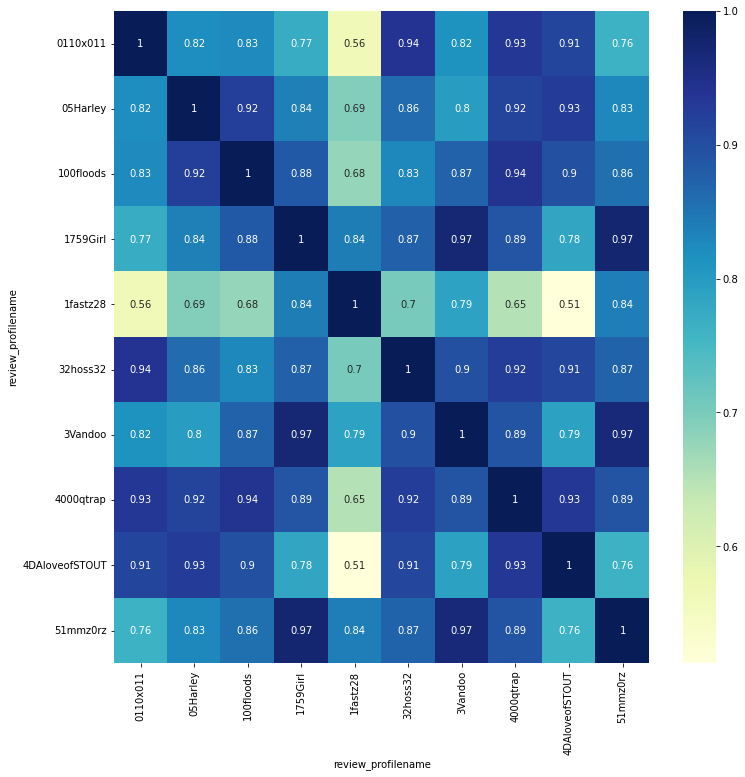

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(top_10_trans.corr(method='pearson'),annot=True,cmap='YlGnBu')
plt.show()

**Item based similarity.**

In [ ]:
beer_features =  train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
).T

In [ ]:
beer_features.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [ ]:
df_subtracted.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,-0.209559,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.227273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,NaN,NaN,NaN,NaN,0.146341,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Cosine Similarity**

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.         -0.04400353  0.10450266 ...  0.          0.01448028
   0.        ]
 [-0.04400353  1.          0.09372582 ...  0.0850787   0.00291194
   0.        ]
 [ 0.10450266  0.09372582  1.         ...  0.0035514   0.00406233
  -0.00307617]
 ...
 [ 0.          0.0850787   0.0035514  ...  1.         -0.00938534
   0.02076853]
 [ 0.01448028  0.00291194  0.00406233 ... -0.00938534  1.
  -0.01383373]
 [ 0.          0.         -0.00307617 ...  0.02076853 -0.01383373
   1.        ]]


filtering the correlations which are positive

In [ ]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.        , 0.10450266, ..., 0.        , 0.01448028,
        0.        ],
       [0.        , 1.        , 0.09372582, ..., 0.0850787 , 0.00291194,
        0.        ],
       [0.10450266, 0.09372582, 1.        , ..., 0.0035514 , 0.00406233,
        0.        ],
       ...,
       [0.        , 0.0850787 , 0.0035514 , ..., 1.        , 0.        ,
        0.02076853],
       [0.01448028, 0.00291194, 0.00406233, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02076853, 0.        ,
        1.        ]])

**Prediction**

In [ ]:
ratings_predicted_item = np.dot((beer_features.fillna(0).T),item_correlation)
ratings_predicted_item

array([[0.34235531, 0.75146   , 0.38412469, ..., 0.48116593, 0.52345769,
        0.77572526],
       [0.71258622, 0.64753816, 0.73475309, ..., 0.28995678, 0.97169955,
        0.71279731],
       [0.46282109, 0.5872456 , 0.85154498, ..., 0.44909618, 1.64527057,
        1.29395964],
       ...,
       [1.07385459, 1.61019101, 1.67158656, ..., 0.3944633 , 0.77874012,
        1.71624525],
       [1.09224646, 1.72533943, 1.92921117, ..., 1.24599129, 1.05097703,
        1.73377634],
       [0.82376766, 0.8113629 , 1.71488137, ..., 0.28608375, 0.17085498,
        0.53393879]])

In [ ]:
ratings_predicted_item.shape

(3176, 2064)

In [ ]:
dummy_train.shape

(3176, 2064)

**Filtering for the beer not rated by the customer.**

In [ ]:
final_rating_item = np.multiply(ratings_predicted_item,dummy_train)

In [ ]:
final_rating_item.head()


beer_beerid,5.0,6.0,7.0,10.0,14.0,15.0,17.0,19.0,30.0,31.0,...,72138.0,73131.0,74123.0,74272.0,74323.0,74390.0,74548.0,74579.0,74986.0,75086.0
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.342355,0.751460,0.384125,0.394751,0.518081,0.616307,1.269480,0.304877,1.825000,0.633090,...,1.193215,0.395974,0.410392,0.477947,0.292114,0.661560,0.153989,0.481166,0.523458,0.775725
05Harley,0.712586,0.647538,0.734753,0.823217,1.122898,1.193213,0.388521,0.603979,1.794392,0.648156,...,0.853363,0.341516,0.283114,0.596040,0.426262,0.886571,1.198717,0.289957,0.971700,0.712797
100floods,0.462821,0.587246,0.851545,0.501116,0.337511,0.883324,1.014838,0.456864,1.389536,0.665432,...,0.915738,0.858342,1.062284,0.786348,0.979915,0.424195,1.781559,0.449096,1.645271,1.293960
1759Girl,1.021984,1.334222,1.837720,1.377177,0.429358,0.915645,1.431032,0.647022,1.931059,1.463040,...,0.785605,1.351058,1.000940,1.067787,0.618972,0.881386,1.071166,0.418458,1.069470,1.520273
1fastz28,2.167030,0.000000,3.917724,0.000000,3.018607,3.023579,4.026254,2.810249,2.707619,4.251917,...,3.078821,3.249689,0.000000,1.831572,1.199461,1.714239,3.136701,1.591849,1.651941,4.361236


**Top 10 recommendation for 1st user**


In [ ]:
final_rating_item.iloc[1].sort_values(ascending=False)[:10]

beer_beerid
48194.0    2.576512
33894.0    2.358088
1504.0     2.348394
34094.0    2.344480
34363.0    2.314391
             ...   
43120.0    0.823739
1163.0     0.823415
32413.0    0.823292
36342.0    0.823282
10.0       0.823217
Name: 05Harley, Length: 818, dtype: float64

In [ ]:
beers_top_10 = final_rating_item.iloc[:10,:10]

In [ ]:
beers_top_10

beer_beerid,5.0,6.0,7.0,10.0,14.0,15.0,17.0,19.0,30.0,31.0
review_profilename,,,,,,,,,,
0110x011,0.342355,0.751460,0.384125,0.394751,0.518081,0.616307,1.269480,0.304877,1.825000,0.633090
05Harley,0.712586,0.647538,0.734753,0.823217,1.122898,1.193213,0.388521,0.603979,1.794392,0.648156
100floods,0.462821,0.587246,0.851545,0.501116,0.337511,0.883324,1.014838,0.456864,1.389536,0.665432
1759Girl,1.021984,1.334222,1.837720,1.377177,0.429358,0.915645,1.431032,0.647022,1.931059,1.463040
1fastz28,2.167030,0.000000,3.917724,0.000000,3.018607,3.023579,4.026254,2.810249,2.707619,4.251917
32hoss32,0.562140,1.095681,1.385623,1.516970,0.843606,1.005124,0.987884,0.619942,0.753036,0.889744
3Vandoo,1.095043,1.091958,1.039371,1.558034,1.837948,1.073385,1.228034,1.355401,1.265471,2.362162
4000qtrap,0.499267,1.534255,1.453896,1.118475,0.872041,1.620466,0.985893,1.052868,1.019997,1.528625
4DAloveofSTOUT,0.689964,0.660164,0.664731,0.851327,0.470924,0.595179,1.128976,0.621397,2.940625,1.120665


In [ ]:
beers_top_10.corr(method='pearson')

beer_beerid,5.0,6.0,7.0,10.0,14.0,15.0,17.0,19.0,30.0,31.0
beer_beerid,,,,,,,,,,
5.0,1.000000,-0.519166,0.894319,-0.330967,0.881971,0.832116,0.882912,0.928322,0.456511,0.942952
6.0,-0.519166,1.000000,-0.363519,0.818430,-0.502520,-0.439258,-0.571846,-0.460801,-0.632783,-0.398979
7.0,0.894319,-0.363519,1.000000,-0.338820,0.765630,0.912822,0.907692,0.889027,0.239216,0.874771
10.0,-0.330967,0.818430,-0.338820,1.000000,-0.309885,-0.457795,-0.566272,-0.362020,-0.545185,-0.291928
14.0,0.881971,-0.502520,0.765630,-0.309885,1.000000,0.867570,0.765227,0.946996,0.226390,0.911208
15.0,0.832116,-0.439258,0.912822,-0.457795,0.867570,1.000000,0.827010,0.932798,0.190849,0.864440
17.0,0.882912,-0.571846,0.907692,-0.566272,0.765227,0.827010,1.000000,0.875651,0.425872,0.881094
19.0,0.928322,-0.460801,0.889027,-0.362020,0.946996,0.932798,0.875651,1.000000,0.304105,0.980442
30.0,0.456511,-0.632783,0.239216,-0.545185,0.226390,0.190849,0.425872,0.304105,1.000000,0.349190


**Model Evaluation**

***using user similarity***

In [ ]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[ 1.00000000e+00 -9.94756754e-03  0.00000000e+00 ...  8.12730982e-04
   6.02316422e-02  0.00000000e+00]
 [-9.94756754e-03  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 8.12730982e-04  0.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   3.81129997e-03  0.00000000e+00]
 [ 6.02316422e-02  0.00000000e+00  0.00000000e+00 ...  3.81129997e-03
   1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


In [ ]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings


array([[0.41953876, 0.2239049 , 0.79532046, ..., 0.53579109, 2.08365869,
        0.21766579],
       [0.36167873, 0.20596454, 0.60385023, ..., 1.45376645, 0.00927267,
        0.76166973],
       [0.07257225, 0.2557648 , 0.36255464, ..., 0.11783901, 0.15126308,
        0.01956389],
       ...,
       [1.285045  , 3.26215724, 1.23552542, ..., 1.32916552, 0.09780408,
        1.51801313],
       [0.77927749, 0.80168546, 0.31702962, ..., 0.18221054, 0.76517721,
        0.48848761],
       [1.08686234, 0.72940809, 0.82136761, ..., 0.02197787, 0.36178801,
        0.        ]])

In [ ]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)


In [ ]:
test_user_final_rating.head()

beer_beerid,5.0,6.0,7.0,10.0,14.0,15.0,17.0,19.0,30.0,31.0,...,72138.0,73131.0,74123.0,74272.0,74323.0,74390.0,74548.0,74579.0,74986.0,75086.0
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
test_df = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
)

In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
rmse = (sum(sum((test_df - y )**2))/total_non_nan)**0.5
print(rmse)


1.8019479109525838


**By Item Similarity**

In [ ]:
item_test_beer_features = test.pivot(index='review_profilename',columns='beer_beerid',values = 'beer_rating').T

In [ ]:
item_test_beer_features.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mean = np.nanmean(item_test_beer_features,axis=1)
item_subtracted = (item_test_beer_features.T-mean).T

In [ ]:
item_subtracted.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
item_test_correlation = 1-pairwise_distances( item_subtracted.fillna(0),metric='cosine')
item_test_correlation[np.isnan(item_test_correlation)] = 0
item_test_correlation[item_test_correlation<0] = 0

In [ ]:
item_test_correlation.shape

(2064, 2064)

In [ ]:
item_test_predicted_rating  = (np.dot(item_test_correlation,item_test_beer_features.fillna(0))).T
item_test_final_rating = np.multiply(item_test_predicted_rating, dummy_test)
item_test_final_rating.head()

beer_beerid,5.0,6.0,7.0,10.0,14.0,15.0,17.0,19.0,30.0,31.0,...,72138.0,73131.0,74123.0,74272.0,74323.0,74390.0,74548.0,74579.0,74986.0,75086.0
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
item_test_df = test.pivot(index='review_profilename',columns='beer_beerid',values='beer_rating')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = item_test_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_df_1 = test.pivot(index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
)
    

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,


MinMaxScaler(feature_range=(1, 5))


**RMSE**

In [ ]:
rmse = (sum(sum((test_df_1 - y )**2))/total_non_nan)**0.5
print(rmse)

2.095884086125913


RMSE value for user based similarity is 1.8 and for item based it is 2.1. SO we should go for user based similarity model

**Recommendation of the names of the top 5 beers to the users 'cokes', 'genog' and 'giblet' using both the models.**

**Reccomending thru the user based similarity model**

In [ ]:
cokes_user = pd.DataFrame(user_final_rating[user_final_rating.index =='cokes']).T
cokes_user.sort_values(by= 'cokes',ascending=False)[:5]

review_profilename,cokes
beer_beerid,
412.0,32.024196
34.0,30.172181
1708.0,29.101075
4083.0,29.092111
131.0,28.999912
...,...
43738.0,4.996815
1496.0,4.993086
1373.0,4.992869


In [ ]:
genog_user = pd.DataFrame(user_final_rating[user_final_rating.index =='genog']).T
genog_user.sort_values(by= 'genog',ascending=False)[:5]

review_profilename,genog
beer_beerid,
2093.0,30.471891
1093.0,30.347224
131.0,29.895000
412.0,29.690869
1013.0,27.468988
...,...
4202.0,4.191090
2652.0,4.187139
32631.0,4.186559


In [ ]:
giblet_user = pd.DataFrame(user_final_rating[user_final_rating.index =='giblet']).T
giblet_user.sort_values(by= 'giblet',ascending=False)[:5]

review_profilename,giblet
beer_beerid,
2093.0,40.310395
412.0,38.226239
92.0,38.086141
355.0,36.585847
1093.0,36.243323
...,...
2319.0,7.603108
62254.0,7.591463
24259.0,7.572966


**Reccomending thru the item based similarity model**

In [ ]:
cokes_item = pd.DataFrame(final_rating_item[final_rating_item.index =='cokes']).T
cokes_item.sort_values(by= 'cokes',ascending=False)[:5]

review_profilename,cokes
beer_beerid,
3706.0,17.012798
7879.0,14.665412
20524.0,14.392997
53899.0,14.295656
21363.0,13.689571
...,...
944.0,7.291866
2213.0,7.280108
44283.0,7.279445


In [ ]:
genog_item = pd.DataFrame(final_rating_item[final_rating_item.index =='genog']).T
genog_item.sort_values(by= 'genog',ascending=False)[:5]

review_profilename,genog
beer_beerid,
2361.0,6.181365
10301.0,6.097472
34313.0,5.752392
36179.0,5.687482
34484.0,5.349008
...,...
1324.0,1.190558
60940.0,1.181863
582.0,1.179940


In [ ]:
giblet_item = pd.DataFrame(final_rating_item[final_rating_item.index =='giblet']).T
giblet_item.sort_values(by= 'giblet',ascending=False)[:5]

review_profilename,giblet
beer_beerid,
573.0,3.802415
54413.0,3.651570
159.0,3.602793
1075.0,3.441496
22809.0,3.431392
...,...
45723.0,0.934141
41626.0,0.933560
60681.0,0.930634


**All the recommendations to the users shown.**